Highschool Model Summary:
                            OLS Regression Results                            
Dep. Variable:                 salary   R-squared:                       0.660
Model:                            OLS   Adj. R-squared:                  0.660
Method:                 Least Squares   F-statistic:                     729.6
Date:                Thu, 17 Oct 2024   Prob (F-statistic):           5.46e-90
Time:                        18:07:49   Log-Likelihood:                -1411.0
No. Observations:                 377   AIC:                             2826.
Df Residuals:                     375   BIC:                             2834.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         17.2028     

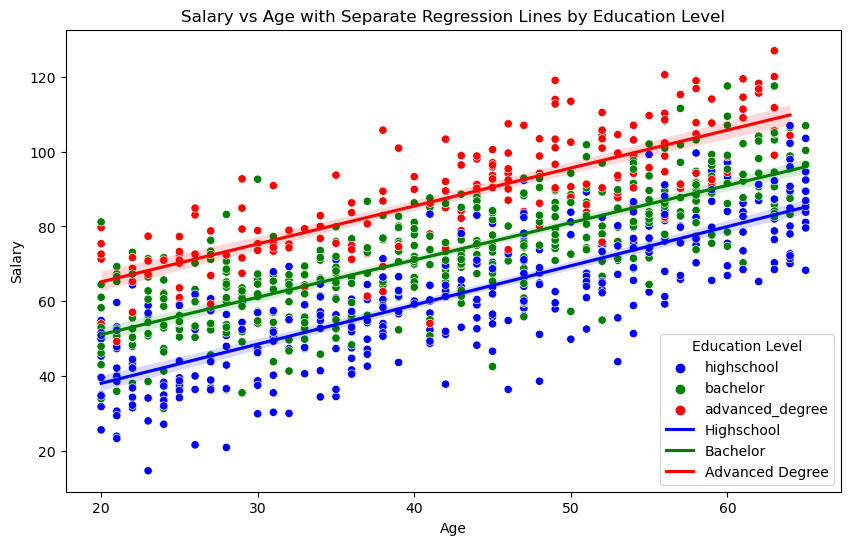

In [1]:
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
data = pd.read_csv("salary_data.csv")

# Convert education to a categorical variable if it's not already
data['education'] = pd.Categorical(data['education'], categories=['highschool', 'bachelor', 'advanced_degree'])

# Subset data by education level
data_highschool = data[data['education'] == 'highschool']
data_bachelor = data[data['education'] == 'bachelor']
data_advanced = data[data['education'] == 'advanced_degree']

# Perform separate linear regressions for each education level
def fit_linear_model(subset_data):
    X = sm.add_constant(subset_data['age'])  # Adds a constant term (intercept)
    model = sm.OLS(subset_data['salary'], X).fit()
    return model

model_highschool = fit_linear_model(data_highschool)
model_bachelor = fit_linear_model(data_bachelor)
model_advanced = fit_linear_model(data_advanced)

# View the summary of each model
print("Highschool Model Summary:")
print(model_highschool.summary())

print("\nBachelor Model Summary:")
print(model_bachelor.summary())

print("\nAdvanced Degree Model Summary:")
print(model_advanced.summary())

# Plot the data and regression lines for each education level
plt.figure(figsize=(10, 6))
sns.scatterplot(x='age', y='salary', hue='education', data=data, palette={'highschool': 'blue', 'bachelor': 'green', 'advanced_degree': 'red'})

# Plot the regression lines for each subset
sns.regplot(x='age', y='salary', data=data_highschool, scatter=False, color='blue', label='Highschool')
sns.regplot(x='age', y='salary', data=data_bachelor, scatter=False, color='green', label='Bachelor')
sns.regplot(x='age', y='salary', data=data_advanced, scatter=False, color='red', label='Advanced Degree')

# Customize the plot
plt.title('Salary vs Age with Separate Regression Lines by Education Level')
plt.xlabel('Age')
plt.ylabel('Salary')
plt.legend(title='Education Level')
plt.show()
